In this section, we will discuss how to pick the best polynomial order and problems that arise when selecting the wrong order polynomial


In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
%matplotlib inline

df = pd.read_csv("imports-85.DATA", header = None) #header = None if we don't specify the parameters of each colm
headers = ["symboling","normalized-losses","make","fuel-type","aspiration","num-of-doors","body-style",
          "drive-wheels","engine-location","wheel-base","length","width","height","curb-weight","engine-type",
          "num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
          "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers
df.replace("?", np.nan, inplace = True)
df["price"] =  df["price"].astype("float")
df['horsepower'] = df['horsepower'].astype("float")
df.dropna(subset=["price"],axis=0,inplace=True)
df.dropna(subset=["horsepower"],axis=0,inplace=True)

In [7]:
#For model evaluation we need to split data into training and testing sets
#split 70% training 30% testing
y_data = df['price']
x_data=df.drop('price',axis=1)

from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 30
number of training samples: 169


 Sometimes you do not have sufficient testing data; as a result, you may want to perform Cross-validation. Let's  go over several methods that you can use for  Cross-validation. 

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lre=LinearRegression()
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)
np.mean(Rcross)

0.5177982696090335

#When the model is too simple to fit the data its called underfitting
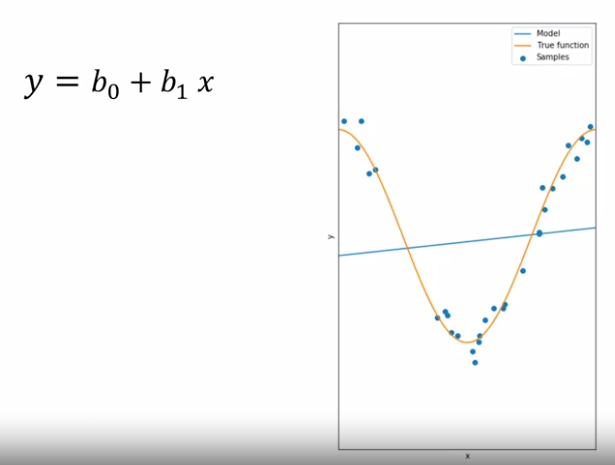


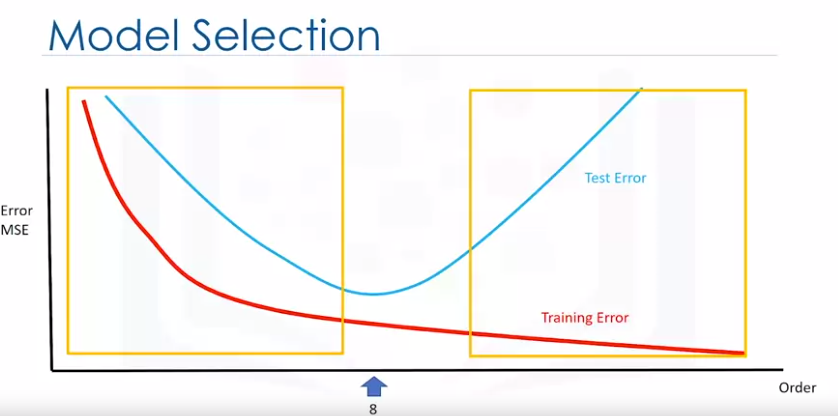

Text(3, 0.75, 'Maximum R^2 ')

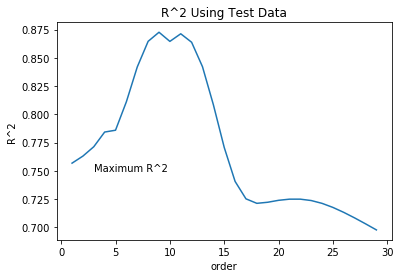

In [19]:
#In this code we search which order of the polynomial mode its better. 
#We can do it analyzing the r^2 of each order. (Of course creating a model (fit) for all the data)

from sklearn.preprocessing import PolynomialFeatures

Rsqu_test = []

order = [_ for _ in range(1,30)]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lre.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lre.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ') 

In [24]:
#Ridge regresion gives a weight (alpha) to the orders in order to get a more accurate model
from sklearn.linear_model import Ridge

RigeModel=Ridge(alpha=0.1)
RigeModel.fit(x_train_pr, y_train)
Yhat = RigeModel.predict(x_test_pr)

print('predicted:', Yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [15131.23413576 11460.11004084 11459.67902013 11459.67848964]
test set : [15750. 12945.  7295.  7349.]
